## Regrading the popularity of Spotify Past Decades Songs (50s-10s)

|  Group 3                            |             |
| ----------------------------------- | ----------- | 
|   Wai Yin Chu                       |  202291674  |
|   Prabha Mahendra Kumar             |  202272638  |
|   Akshada Sanjay Dhadge             |  202281887  |
|   Divya shri Krishnasamy Rajagopal  |  202262651  |
|   Felix Achile Etu                  |  202260243  |
|   Safiullah Mehrabi                 |  202289419  |


### Goal

For this competition, the aim is to provide a prediction of songs using the provided information from the dataset. To provide better performance and accuracy, data visualisation and data exploration are performed to deduce the relative columns in data and which model might suit for analysis.

#### The process will break down in three-part:
##### 1) Data Handle
* Import Data CSV file using Pandas
* Clean Data 

##### 2) Basic Data Analysis
* Explore data by Visualisation

##### 3) Data Analysis using model
* Supervised Machine learning Techniques
    + Linear Regressor
    + Support Vector Machine (SVM) using RBF kernels
    + Bagging with Random Forest Regressor
    + Extreme Gradient Boosting Regressor

#### Library Required:
* pandas - to store data in memory in form of dataframe for efficiency
* numpy - to provide a fast numerical array structure and helper function
* seaborn - to provide a graphical presentation and visual analysation
* matplotlib - to provide a graphical presentation and visual analysation
* xgboost - to provide a specific machine learning regressor 
* sklearn library - to provide different machine learning regressor 

#### Data Handle
##### Import data from CSV file to dataframe

In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,LabelEncoder,PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,GradientBoostingRegressor 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor


In [313]:
trainData = pd.read_csv('CS98XRegressionTrain.csv')
trainData = pd.DataFrame(trainData)
testData = pd.read_csv('CS98XRegressionTest.csv')
testData = pd.DataFrame(testData)


Check the shape and information of the train and test dataframe

In [314]:
print('train data shape:',trainData.shape)
print('test data shape:',testData.shape)
print('train data info:',trainData.info())
print('test data info:',testData.info())


train data shape: (453, 15)
test data shape: (114, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB
train data info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns)

Verify if duplicate row or empty cell is found in train and test set

In [315]:

# check if duplicate row exist in test data and train data
print('train data duplicated:',trainData.duplicated().any())
print('test data duplicated:',testData.duplicated().any())

# check if any NaN cell in both train and test data
print('train data NaN:',trainData.columns[trainData.isnull().any()])
print('test data NaN:',testData.columns[testData.isnull().any()])

# check the number of NaN cell in both train and test data
print('train data NaN:',trainData[trainData['top genre'].isna()])


train data duplicated: False
test data duplicated: False
train data NaN: Index(['top genre'], dtype='object')
test data NaN: Index(['top genre'], dtype='object')
train data NaN:       Id                         title                            artist  \
1      2              Unchained Melody                   The Teddy Bears   
8      9           Someone Elses Roses                        Joan Regan   
26    27           Drinks On The House                Green Martini Keys   
72    73                   Pachuko Hop           Ike Carpenter Orchestra   
90    91     Little Things Means A Lot                   Jayne Mansfield   
98    99           The Lady Is A Tramp         Mel Torme & the Mel-Tones   
220  221     If I Give My Heart To You                   The Teddy Bears   
252  253  Happy Days And Lonely Nights  Suzi Miller And Johnson Brothers   
265  266              Stairway Of Love                        Terry Dene   
266  267                           You                        

#### Data cleaning
Per the above result, there are 15 row without top genre since there are 453 row of data in train dataset, those record will be dropped

In [316]:

# filter out the NaN rows - in train data only, even there are empty in test data, it will be ingored as this is not related to the training
# 1) run drop if empty found
# 2) create a new dataframe that for future use
if not(trainData.columns[trainData.isnull().any()].isnull()):
    trainDataC = trainData.drop(trainData[trainData['top genre'].isnull()].index)
else:
    trainDataC = trainData.copy()
testDataC = testData.copy()

# check if any NaN cell in both train and test data after removal
print('after train data NaN:',trainDataC.columns[trainDataC.isnull().any()])
print('after test data NaN:',testDataC.columns[testDataC.isnull().any()])

after train data NaN: Index([], dtype='object')
after test data NaN: Index(['top genre'], dtype='object')


To perform analysis using visualisation and model application, categorical features should be encoded to numerical based for machine learning model fitting. There are multiple types of encoding, one popular type is oneHot encoding which will create an array of new features which is integer based(0 or1). 

In this case, since there are many categories under those columns, there is a possibility that oneHot encoding could cause an overload issue. Label Encoder is used as it will assign a number to each categorical value and replace it which is more suitable for this scenario.  

In [317]:

# encode the object columns - train data and test data
encoder = LabelEncoder()
encodeCols = ["title","artist","top genre"]
testDataClean = testDataC.copy()
trainDataClean = trainDataC.copy()
for col in encodeCols:
    encoder.fit(testDataClean[col])
    testDataClean[col] = encoder.transform(testDataClean[col])
    
for col in encodeCols:
    encoder.fit(trainDataClean[col])
    trainDataClean[col] = encoder.transform(trainDataClean[col])
    
print("train data - after encode:\n",trainDataClean.head())

train data - after encode:
    Id  title  artist  top genre  year  bpm  nrgy  dnce  dB  live  val  dur  \
0   1    265      54          1  1996  107    31    45  -8    13   28  150   
2   3    160      19          1  1979  105    36    63  -9    13   67  245   
3   4    422      18          1  1980  170    28    47 -16    13   33  232   
4   5    138      92         68  1973  121    47    56  -8    15   40  193   
5   6    139      40         80  2010  110    56    71  -7    12   23  223   

   acous  spch  pop  
0     75     3   44  
2     11     3   77  
3     25     3   67  
4     45     3   63  
5     15     6   74  


After cleaning, the train data will be as follow and those data will be used for basic data analysis via visualisation.

In [318]:
trainDataClean.describe()

Id       title      artist   top genre         year  \
count  438.000000  438.000000  438.000000  438.000000   438.000000   
mean   227.600457  218.038813  162.383562   32.547945  1990.881279   
std    130.463047  125.990359   95.913047   26.075252    16.697047   
min      1.000000    0.000000    0.000000    0.000000  1948.000000   
25%    116.250000  109.250000   79.250000    4.000000  1976.000000   
50%    226.500000  218.500000  164.500000   32.000000  1993.000000   
75%    340.750000  326.750000  245.750000   52.000000  2006.000000   
max    453.000000  435.000000  330.000000   85.000000  2019.000000   

              bpm        nrgy        dnce          dB        live         val  \
count  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000   
mean   118.326484   60.504566   59.780822   -8.787671   17.605023   59.625571   
std     25.175735   22.089660   15.404757    3.591005   13.807492   24.480160   
min     62.000000    7.000000   18.000000  -24.000000    2.000000    6.000000   
25%    100.000000   44.000000   50.000000  -11.000000    9.000000   42.250000   
50%    120.000000   64.000000   62.000000   -8.000000   13.000000   61.000000   
75%    133.000000   78.000000   70.750000   -6.000000   23.000000   80.000000   
max    199.000000  100.000000   96.000000   -1.000000   93.000000   99.000000   

              dur       acous        spch         pop  
count  438.000000  438.000000  438.000000  438.000000  
mean   228.267123   32.191781    5.671233   61.557078  
std     63.426812   29.279912    5.571392   12.759353  
min     98.000000    0.000000    2.000000   26.000000  
25%    184.500000    7.000000    3.000000   54.000000  
50%    224.000000   23.000000    4.000000   64.000000  
75%    264.000000   57.000000    6.000000   72.000000  
max    511.000000   99.000000   47.000000   84.000000

In [319]:
trainDataClean

Id  title  artist  top genre  year  bpm  nrgy  dnce  dB  live  val  dur  \
0      1    265      54          1  1996  107    31    45  -8    13   28  150   
2      3    160      19          1  1979  105    36    63  -9    13   67  245   
3      4    422      18          1  1980  170    28    47 -16    13   33  232   
4      5    138      92         68  1973  121    47    56  -8    15   40  193   
5      6    139      40         80  2010  110    56    71  -7    12   23  223   
..   ...    ...     ...        ...   ...  ...   ...   ...  ..   ...  ...  ...   
448  449     57      91          1  1959   80    22    18 -17    10   16  214   
449  450    362     134         25  2010  148    81    53 -13    23   96  147   
450  451     84     199         51  2002  168    55    73  -8    20   61  289   
451  452    201       0         24  2000  165    87    64  -5     6   88  191   
452  453    194     243          4  2002  105    73    68  -8    14   94  281   

     acous  spch  pop  
0       75     3   44  
2       11     3   77  
3       25     3   67  
4       45     3   63  
5       15     6   74  
..     ...   ...  ...  
448     92     4   45  
449     50     3   50  
450     23    14   77  
451      5     8   62  
452     11     2   59  

[438 rows x 15 columns]

#### Basic Data Analysis via visualisation
##### Present the numerical data in graphically:

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


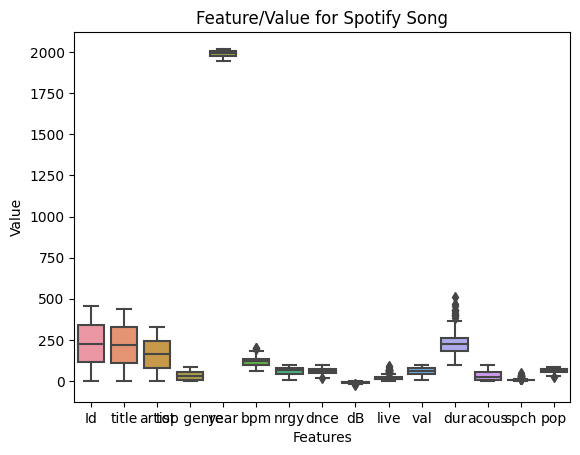

In [320]:
sns.boxplot(data=trainDataClean)
plt.xlabel('Features')
plt.ylabel('Value')
plt.title("Feature/Value for Spotify Song")
plt.show()



The box plot of all features present that there is a number of outliners exists and might affect the prediction result and there exist a big difference in value between each column. Therefore, a more detailed visualisation will perform to provide a comprehensive expression.

In [321]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(12,12), dpi=800) 

plt.subplot2grid((5,2),(0,0))
trainDataClean.dnce.plot(kind='kde')
plt.title("Danceability Level Distribution")  

plt.subplot2grid((5,2),(0,1))
trainDataClean.dB.plot(kind='kde')
plt.title("Loudness Level Distribution")      

plt.subplot2grid((5,2),(1,0))
trainDataClean.nrgy.plot(kind='kde')
plt.title("Energy Level Distribution")  

plt.subplot2grid((5,2),(1,1))
trainDataClean.dur.plot(kind='kde')
plt.title("Duration Level Distribution")

plt.subplot2grid((5,2),(2,0))
trainDataClean.live.plot(kind='kde')
plt.title("Liveness Level Distribution")  

plt.subplot2grid((5,2),(2,1))
trainDataClean.acous.plot(kind='kde')
plt.title("Acousticness Level Distribution")  

plt.subplot2grid((5,2),(3,0))
trainDataClean.year.plot(kind='kde')
plt.title("Year Level Distribution")  

plt.subplot2grid((5,2),(3,1))
trainDataClean.bpm.plot(kind='kde')
plt.title("BPM Level Distribution")  

plt.subplot2grid((5,2),(4,0))
trainDataClean.val.plot(kind='kde')
plt.title("Valence Level Distribution")  

plt.subplot2grid((5,2),(4,1))
trainDataClean.spch.plot(kind='kde')
plt.title("Speechiness Level Distribution")  

plt.tight_layout()
plt.show()

The above graph shows that there are a few graphs have a similar pattern which has two local peaks and the first peak is lower than the second one, such as danceability, energy ,and year. On the other hand, loudness and duration have a similar pattern but instead more two peaks there is a more stable slope before it reach the peak. 

Judging from the above observation, I will pay more attention to these columns (danceability, energy, year, loudness and duration).


##### Present the categorical data that is encoded in graphical form

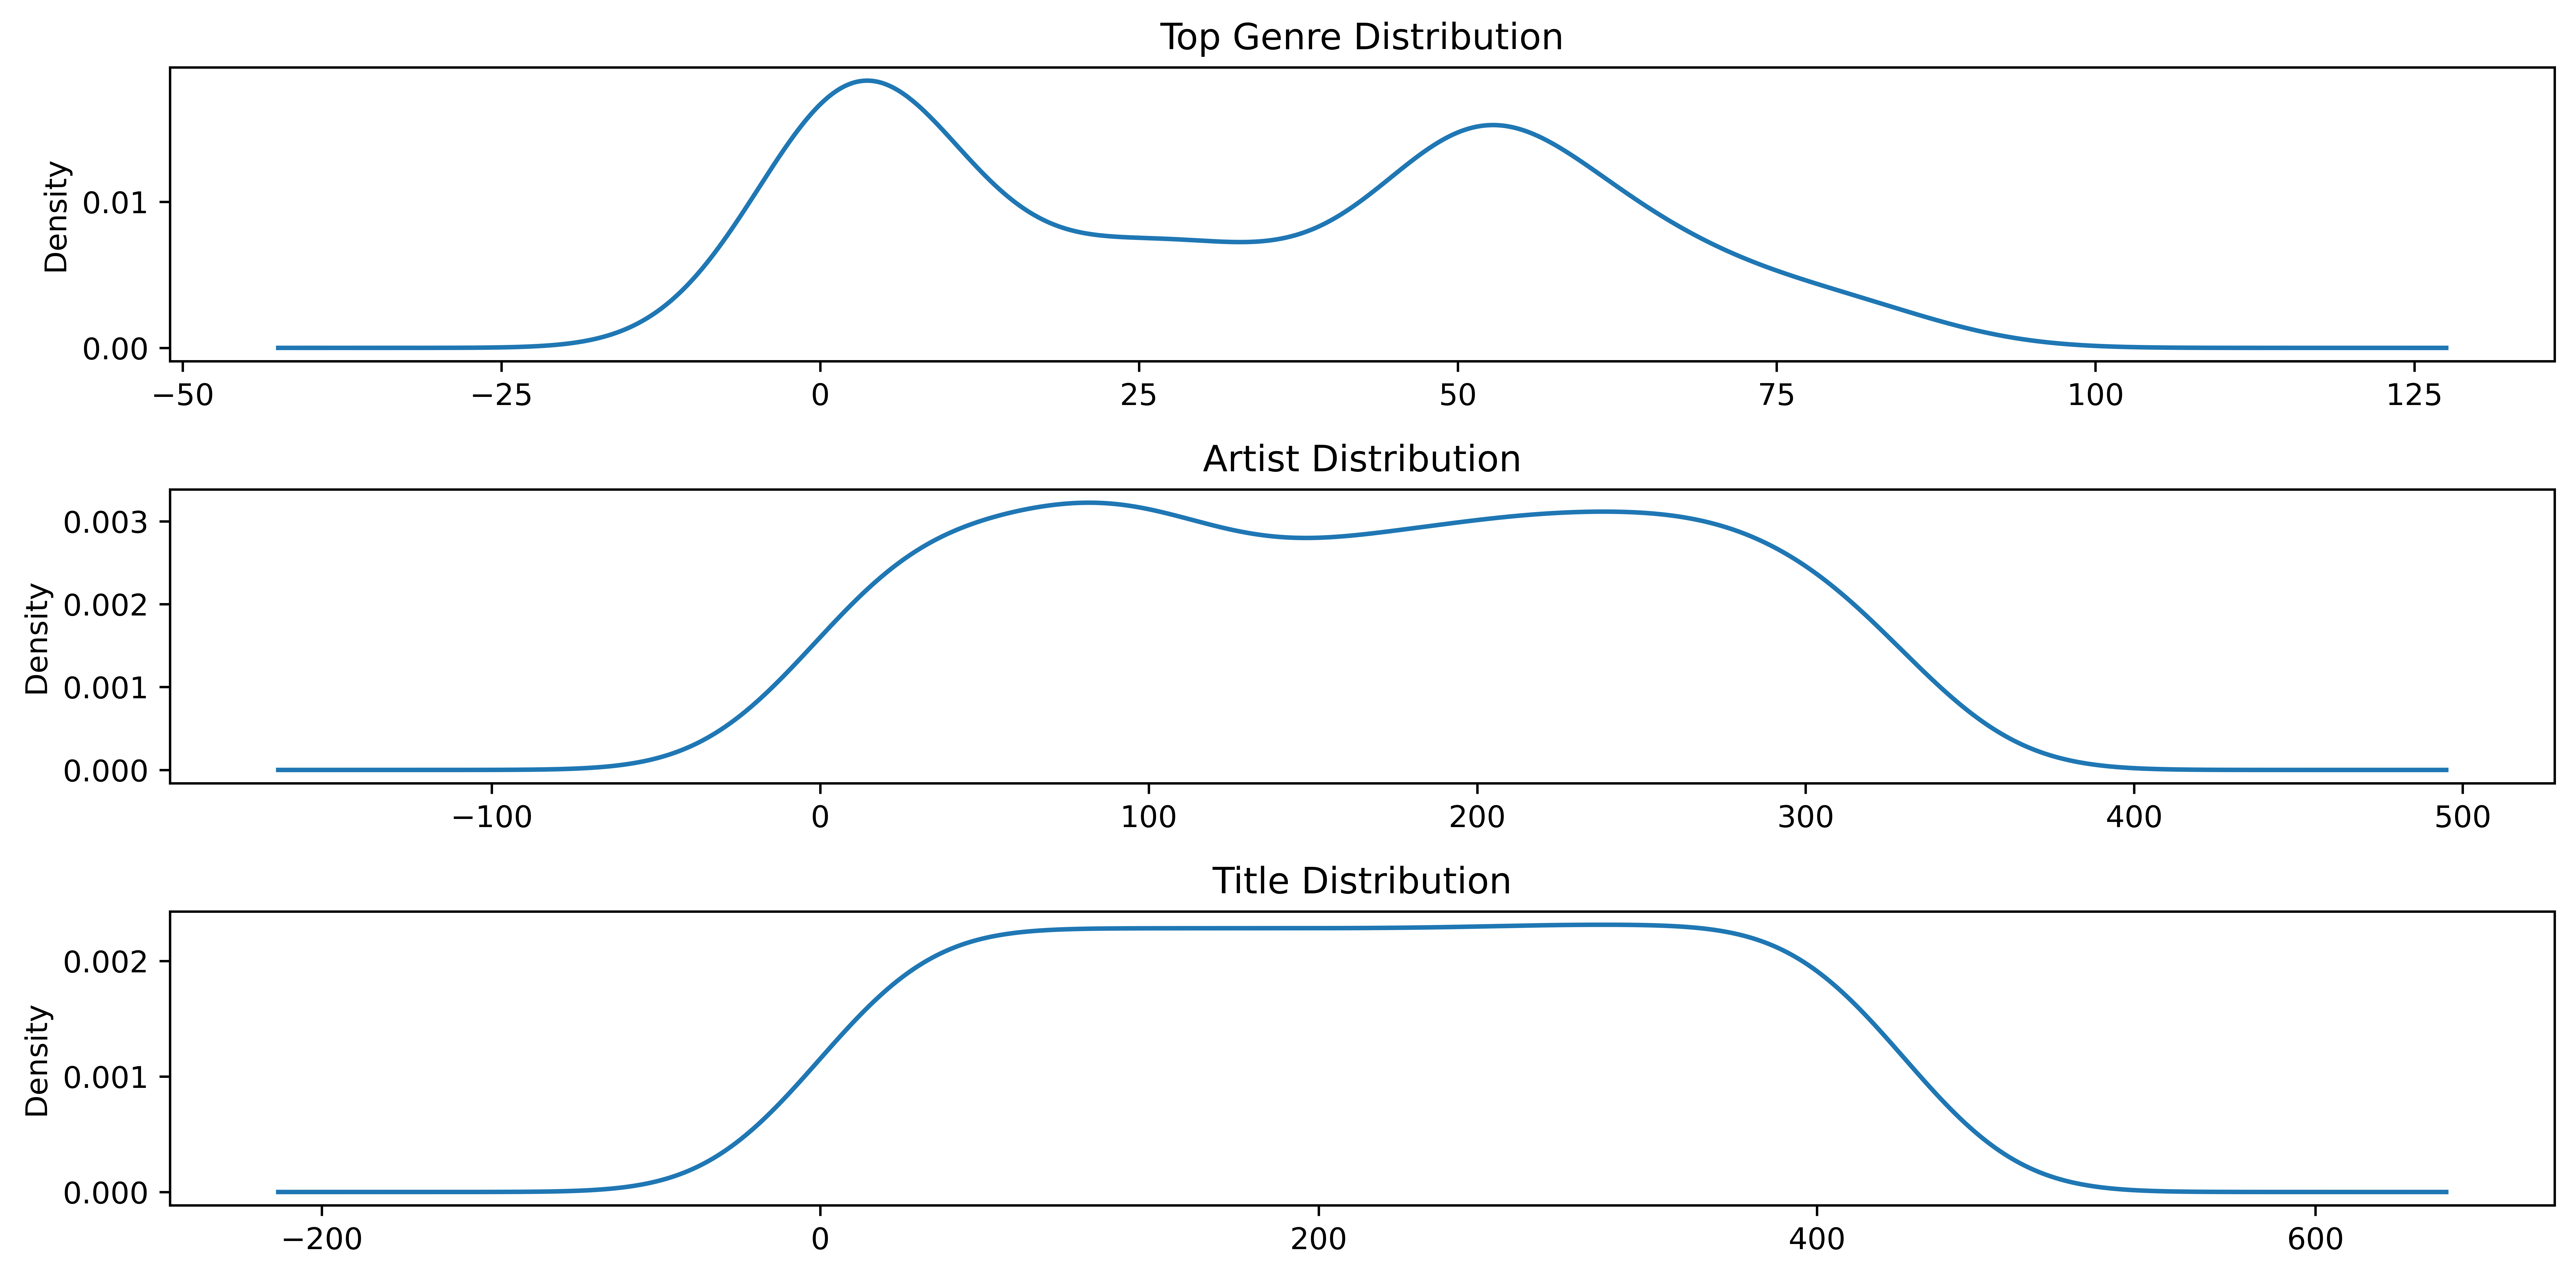

In [322]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(12,6), dpi=800) 

plt.subplot2grid((3,1),(0,0))
trainDataClean['top genre'].plot(kind='kde')
plt.title("Top Genre Distribution")  

plt.subplot2grid((3,1),(1,0))
trainDataClean.artist.plot(kind='kde')
plt.title("Artist Distribution")      

plt.subplot2grid((3,1),(2,0))
trainDataClean.title.plot(kind='kde')
plt.title("Title Distribution")  

plt.tight_layout()
plt.show()

For categorical data, all graphs show a two-peak shape and top genre have a comparatively bigger difference between two peaks. Per this result, top genre will be put on the focus list for data analysis selection.

In addition,the box plot indicates that outliners might exist in the columns. Therefore, a filter of outliners will be performed to conclude if elimination is required. 

In [323]:
# filter the outliner of each columns in train data 
th = 5
outlinerList={}
outlinerCols = trainDataClean.columns
for col in outlinerCols:
    mean = np.mean(trainDataClean[col])
    std=np.std(trainDataClean[col])
    out_list=[]
    for i in trainDataClean[col]:
        z=(i-mean)/std
        if z > th:
            out_list.append(i)
    if (out_list):
        outlinerList[col]= out_list
print("outliers : ", outlinerList)


outliers :  {'live': [93], 'spch': [38, 37, 36, 47]}


According to the above result,a total of 5 outliners from two columns, one from liveness and the rest from speechiness are spotted. The decision to drop those columns will be considered after verifying the correlation of the columns

##### Check the correlation of all columns in dataset before the removal of outliner

Text(0.5, 1.0, 'Corelation of all columns')

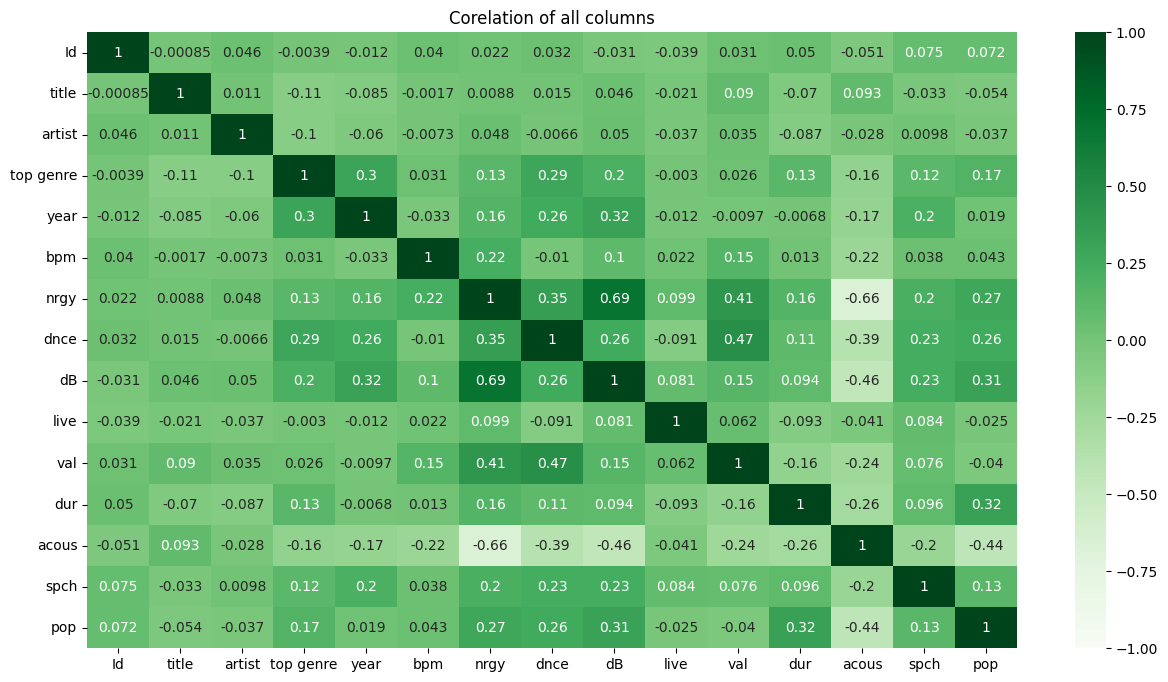

In [324]:

corelation = trainDataClean.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(trainDataClean.corr(), center=0, cmap='Greens',vmin=-1, vmax=1, annot=True)
ax.set_title('Corelation of all columns')

In [325]:
print("before remove outliner:",trainDataClean.shape)

before remove outliner: (438, 15)


From the above matrix, both liveness and speechiness have a not high correlation score and there are a total of 438 lines of records, dropping 5 lines is a limited loss compared to keeping those records. For that reason, those 5 records are removed.

In [326]:

# extract outliner in the dataframe and present the shape of dataframe before and after extraction
for key,value in outlinerList.items():
    print(key,value)
    for i in value:
        trainDataClean.drop(trainDataClean[trainDataClean[key]==i].index, inplace = True)
print("after remove outliner:",trainDataClean.shape)

live [93]
spch [38, 37, 36, 47]
after remove outliner: (433, 15)


##### Regenerate the correlation matrix after the outliner removal

Text(0.5, 1.0, 'Corelation of all columns')

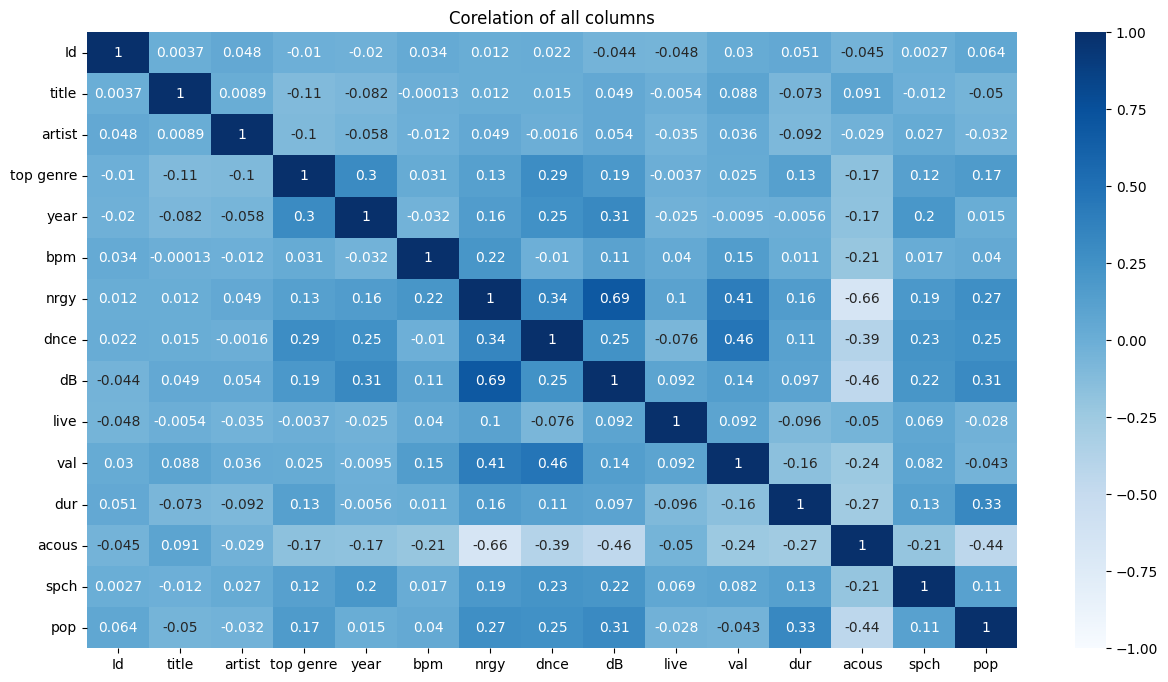

In [327]:

corelation = trainDataClean.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(trainDataClean.corr(), center=0, cmap='Blues',vmin=-1, vmax=1, annot=True)
ax.set_title('Corelation of all columns')

comparing the two matrices, there are only a slight change of score on some aspect and those aspect are not those with high score. From the matrix, "top genre", "nrgy", "dnce", "dB", "dur", "spch" are the only columns that have 0.1 over the above correlation score.

After the correlation matrix, the exploration can go back the frequency and linear regression between each columns.

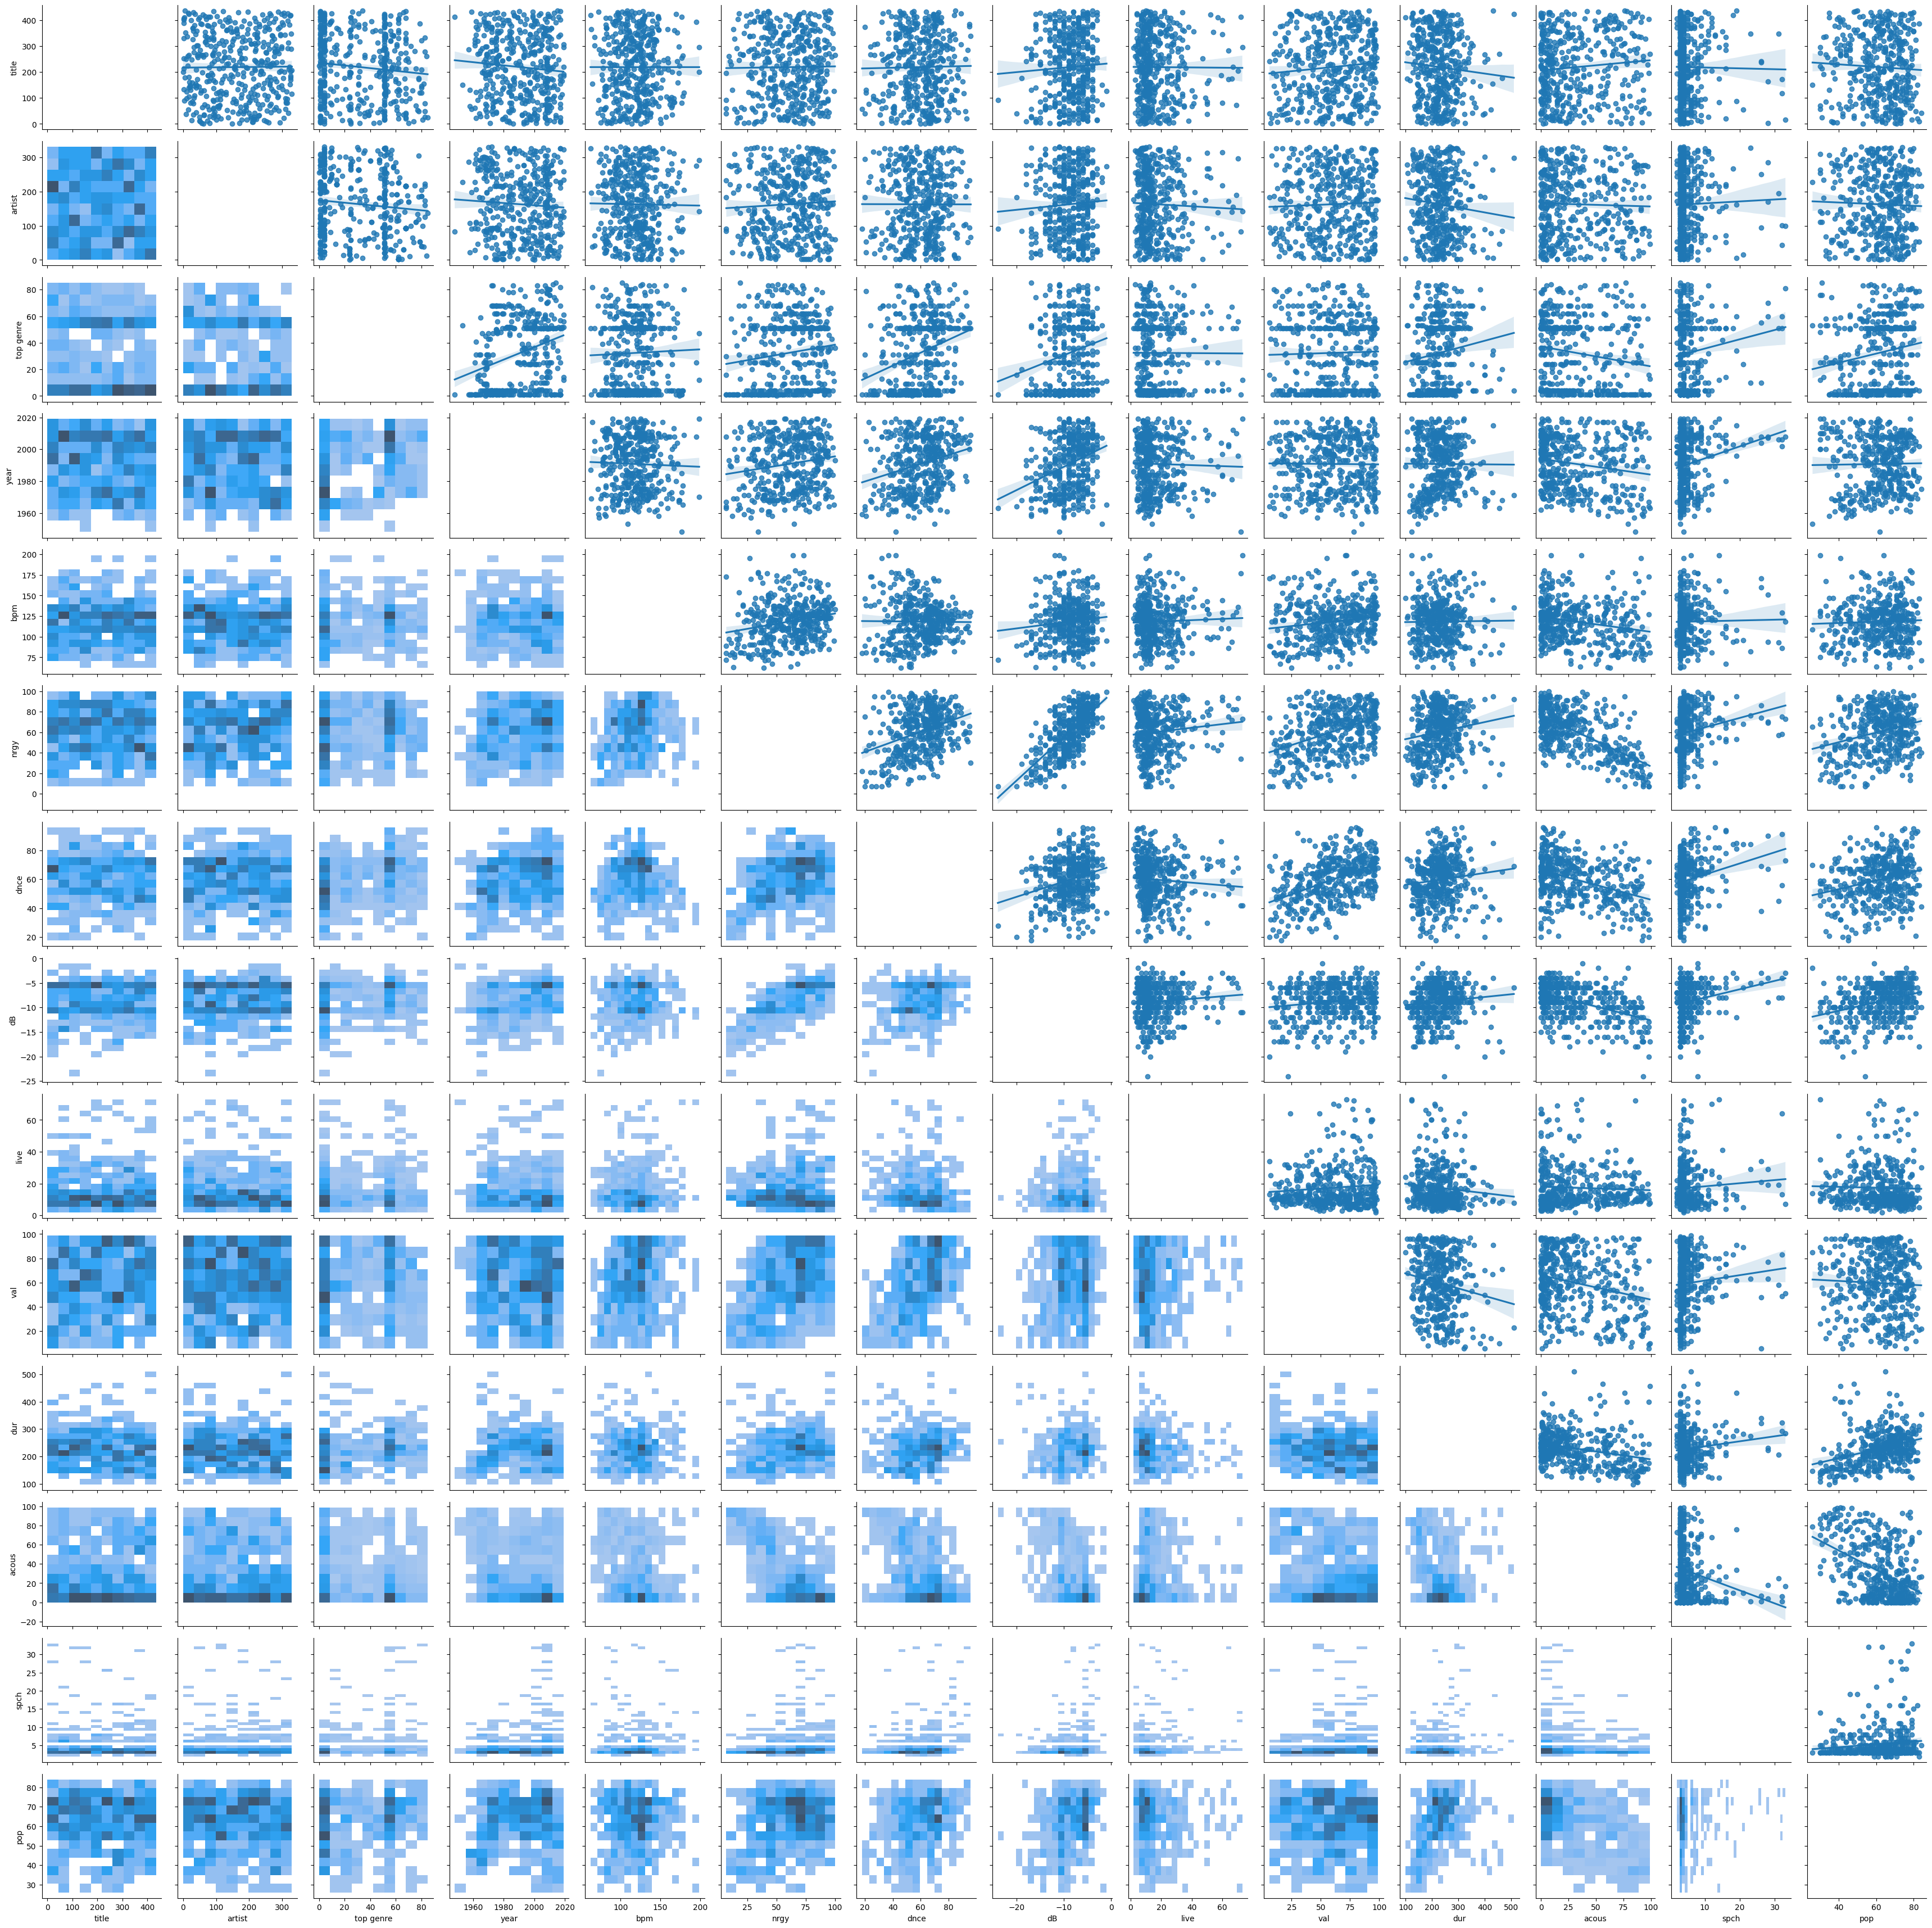

In [328]:
grid = sns.PairGrid(trainDataClean.drop(columns=["Id"]))
grid.map_upper(sns.regplot)
grid.map_lower(sns.histplot)

##### After all the data exploration, the following columns will be applied to the model for further investigate.
* top genre
* nrgy
* dnce
* dB
* dur
* year
* spch

After that, the data preparation for model application start. The action include scaling the data, apply polynomial feature and separate the data into train-test set.

In [329]:
# separated list - train data
# separate x and y
y = trainDataClean["pop"]
x = trainDataClean[["top genre","nrgy","dnce","spch","dB","dur","year"]]
# scale the data before using 
stdScaler = StandardScaler()
xScaled = stdScaler.fit_transform(x)
# for polynomial 
polyFeat = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeat.fit_transform(x)
xPolyScaled = stdScaler.fit_transform(xPoly)
# for first training - scaled
xTrain, xTrainTest, yTrain, yTrainTest = train_test_split(x, y, test_size=0.25, random_state=42)
# for first training - scaled
xTrainS, xTrainSTest, yTrainS, yTrainSTest = train_test_split(xScaled, y, test_size=0.25, random_state=42)
# for first training - scaled poly
xTrainPoly, xTrainPolyTest, yTrainPoly, yTrainPolyTest = train_test_split(xPolyScaled, y, test_size=0.25, random_state=42)


In [330]:
# separate list - test data
yTest = testDataClean["Id"]
xTest = testDataClean[["top genre","nrgy","dnce","spch","dB","dur","year"]]

xScaledTest = stdScaler.fit_transform(xTest)

polyFeat = PolynomialFeatures(degree=2, include_bias=False)
xPolyTest = polyFeat.fit_transform(xTest)


Since there are more than one algorithm will be apply and to provide better readability and reusability. Some functions are developed to reduce the code redundancy issue and for better code manipulation.  

In [331]:
def toCsvFile(yPred, Id,axis,fileName): # function to write the Id and classification result to a CSV file
    predTestdf = pd.DataFrame(yPred)
    result = pd.concat([Id, predTestdf], axis=1, ignore_index=True)
    result = result.set_axis(axis, axis=1)
    result.to_csv(fileName,index=False)
    print("Exported to ",fileName)
    

In [332]:
def score(ytestPred,yPred,algo="this algotrithm"): # function for required score , in this case is RMSE genreation 
    linearMse = mean_squared_error(ytestPred, yPred)
    linearRmse = np.sqrt(linearMse)
    print("RMSE of",algo,":",linearRmse)
    

In [333]:
def fitModel(model,trainX,trainY,testX,algo="this algotrithm",decode=False,testY=None): # function to fit model and decode the label  and call the score function
    model.fit(trainX,trainY)
    yPred = model.predict(testX)
    if decode:
        yPred = encoder.inverse_transform(yPred)
    if testY is not None:
        score(yPred,testY,algo)
    return yPred


#### Data Analysis using model
##### 1) Linear Regression
Linear regression is one of the basic algorithm that is known from the previous semester. The algorithm suitable to find relationship between independent feature to predict the dependent feature,in this case,it is the popularity. Since there is limited information on the relation between feature is linear or not, it will be a good algorithm to start with due to popularity is a continous variable. The RMSE of this algorithm in Kaggle is 8.96506. Yet, it does not perform to an extent that meet our expectation. 

In [334]:
linearReg = LinearRegression() 
# train
fitModel(linearReg,xTrainS, yTrainS,xTrainSTest,"Linear Regression Train",False,yTrainSTest)
# test
yPred = fitModel(linearReg,xScaled, y,xScaledTest,"Linear Regression Test",False)
toCsvFile(yPred,yTest,['Id','pop'],"regression_liinear_Grp3.csv")

RMSE of Linear Regression Train : 11.522055303668036
Exported to  regression_liinear_Grp3.csv


##### 2) Radial Basis Function(RBF) Support Vector Regression (SVR)
After trying to use to a linear regression that expect the the relationship between independent features are forming a linear line, a new approach is applied. Non-linear regression is considered. According to the textbook(2nd Edition P.153), Support Vector Regression (SVR) is a power and versatile machine learning model,then can perfrom linear or non-linear regression and suitable for small to medium-sized dataset. The reason why the specific kernel Radial Basis Function(RBF) is chosen due to the efficient and ability to handling complex data compare to polynomial. The use of polynomial featured data can discover unknown relationship between columns and provide better performance.
Though it provide an improved RMSE score in training data set compare to the linear one, the score in Kaggle is not improving with score 12.91662. 

In [335]:
rbfSVR = SVR(kernel="rbf", degree=2, C=100, epsilon=0.1, gamma="scale")
# train
fitModel(rbfSVR,xTrainPoly, yTrainPoly,xTrainPolyTest,"RBF SVR Train",False,yTrainTest)
# test
yPred = fitModel(rbfSVR,xPolyScaled,y,xPolyTest,"RBF SVR Test",False)
toCsvFile(yPred,yTest,['Id','pop'],"regression_RBF_SVC_Grp3.csv")

RMSE of RBF SVR Train : 9.735666535141307
Exported to  regression_RBF_SVC_Grp3.csv


##### 3) Bagging with Random Forest Regression
After exploring some non tree-based algorithms, tree-based algorithms are used to predict the popularity of Spotify Songs. They can handle non-linear relationships well, especially random forest. Random Forest is an algorithm that has multiple decision trees and combines the result then predict using the mean/medium of those result. Even though random forest algorithm is a combination of decision tree, bagging algorithm is adapted to reduce possible bias situations. In this scenario, the RMSE of train-test data is reduced to 8.93969 which is an approximately 0.9 improvement. The difference in Kaggle is even more impressive which is 7.42829. 

In [336]:

baggedRFReg = BaggingRegressor(base_estimator=RandomForestRegressor(max_leaf_nodes=50, n_jobs=-1),n_estimators=15, random_state=0,bootstrap=True, n_jobs=-1)
# train
fitModel(baggedRFReg,xTrainS, yTrainS,xTrainSTest,"Bagging Random Forest Train",False,yTrainSTest)
# test
yPred = fitModel(baggedRFReg,x, y,xTest,"Bagging Random Forest Test",False)
toCsvFile(yPred,yTest,['Id','pop'],"regression_Bagged_RF_Grp3.csv")

RMSE of Bagging Random Forest Train : 8.939693218070055
Exported to  regression_Bagged_RF_Grp3.csv


##### 4) Extreme Gradient Boosting Regressor(XGBoosting)
After using a tree-based algorithm, a new idea appears to try some algorithm that is a bit more modern. After research, an algorithm seems suitable. It is Extreme Gradient Boosting Regressor that was released on 2014, which is similar to random forest algorithm but with Gradient Boosting algorithm is used. Both of them are an ensemble of decision trees but instead of have a full decision tree, it uses a bunch of simple bias decision trees(weak learner). Then Gradient Boosting Regressor are used to correct the previously generated tree(weak learner), after multiple iterations, the tree will become more accurate and with a higher performance since it no longer need to generate full decision tree. the RMSE of train-test data has slightly increased to 8.99789 which is a 0.06 setback. The difference in Kaggle is more impressive than the train set result which is an improvement with score = 7.13424.

In [337]:

xgbReg = XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.9, colsample_bytree=0.8)
fitModel(xgbReg,xTrainS, yTrainS,xTrainSTest,"XGBoosting Train",False,yTrainSTest)
# test
yPred = fitModel(xgbReg,x, y,xTest,"XGBoosting Test",False)
toCsvFile(yPred,yTest,['Id','pop'],"regression_XGB_Grp3.csv")

RMSE of XGBoosting Train : 8.997896965124013
Exported to  regression_XGB_Grp3.csv


### Summary
The dataset is an imbalanced dataset, it is difficult to determine which attribute to analysis without detail exploring. By comparing the correlation score, shape, and frequency of each attributes, I have decided to apply the following to be applied in model 

* Danceability
* Energy Level 
* Duration
* Year of Song
* Loudness
* Genre
* Speechiness

After reducing the dataset for modeling, I first start with linear regressor as it performs well for continuous variables, the result can provide a workable result(Score: 8.96506). To discover a different variety of models, Radial Basis Function(RBF) Support Vector Regression (SVR) is chosen because of the suitability for small to medium-sized dataset nature and the effectiveness. Yet, the Kaggle result(Score: 12.91662) presented that it does not suit this dataset. To achieve a more comprehensive understanding, tree-based algorithm is the one we should delve into. Random forest with bagging regressor can handle imbalanced data well due to tree nature and bagging can reduce the bias which the effectiveness can be proved by the Kaggle result(Score: 7.44919) Yet, random forest build full decision to increase the performance, Extreme Gradient Boosting Regressor(XGBoosting) is used to reduce the workload since it builds weak learner instead of a complete tree and use self correct in each iteration to improve accuracy, Kaggle result is the better among all algorithms.

To conclude,the algorithm "Extreme Gradient Boosting Regressor" can provide a feasible solution for people who are interested in figuring out the popularity of Spotify songs as long as suitable data is provided. 

In general, I have applied machine learning models that have learned in class with full understanding and am able to analyse and pick the suitable model according to the dataset. The final score of Kaggle is <b>7.13424</b>